In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train_data_cleaned.csv')

df.head()


,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,10178643.0,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,10513916.0,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,10334589.0,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,10458365.0,0,0,0,0,1,2345.49,2069.55,9243.99,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739088 entries, 0 to 739087
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       739088 non-null  float64
 1   outlet_city_0     739088 non-null  int64  
 2   outlet_city_1     739088 non-null  int64  
 3   outlet_city_2     739088 non-null  int64  
 4   outlet_city_3     739088 non-null  int64  
 5   outlet_city_4     739088 non-null  int64  
 6   luxury_sales      739088 non-null  float64
 7   fresh_sales       739088 non-null  float64
 8   dry_sales         739088 non-null  float64
 9   cluster_category  739088 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 56.4 MB


SPLITTING DATA SET

In [ ]:
from sklearn.model_selection import train_test_split

# Drop Customer_ID
df = df.drop(columns=['Customer_ID'])


# Separate features (X) and target variable (y)
X = df.drop(columns=['cluster_category'])  # Features
y = df['cluster_category']  # Target variable

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.head()

,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,0,0,0,0,1,2345.49,2069.55,9243.99,4


Train the Decision Tree Model

In [ ]:

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)


# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

Predictions and evaluation


Visualising decision tree classifier

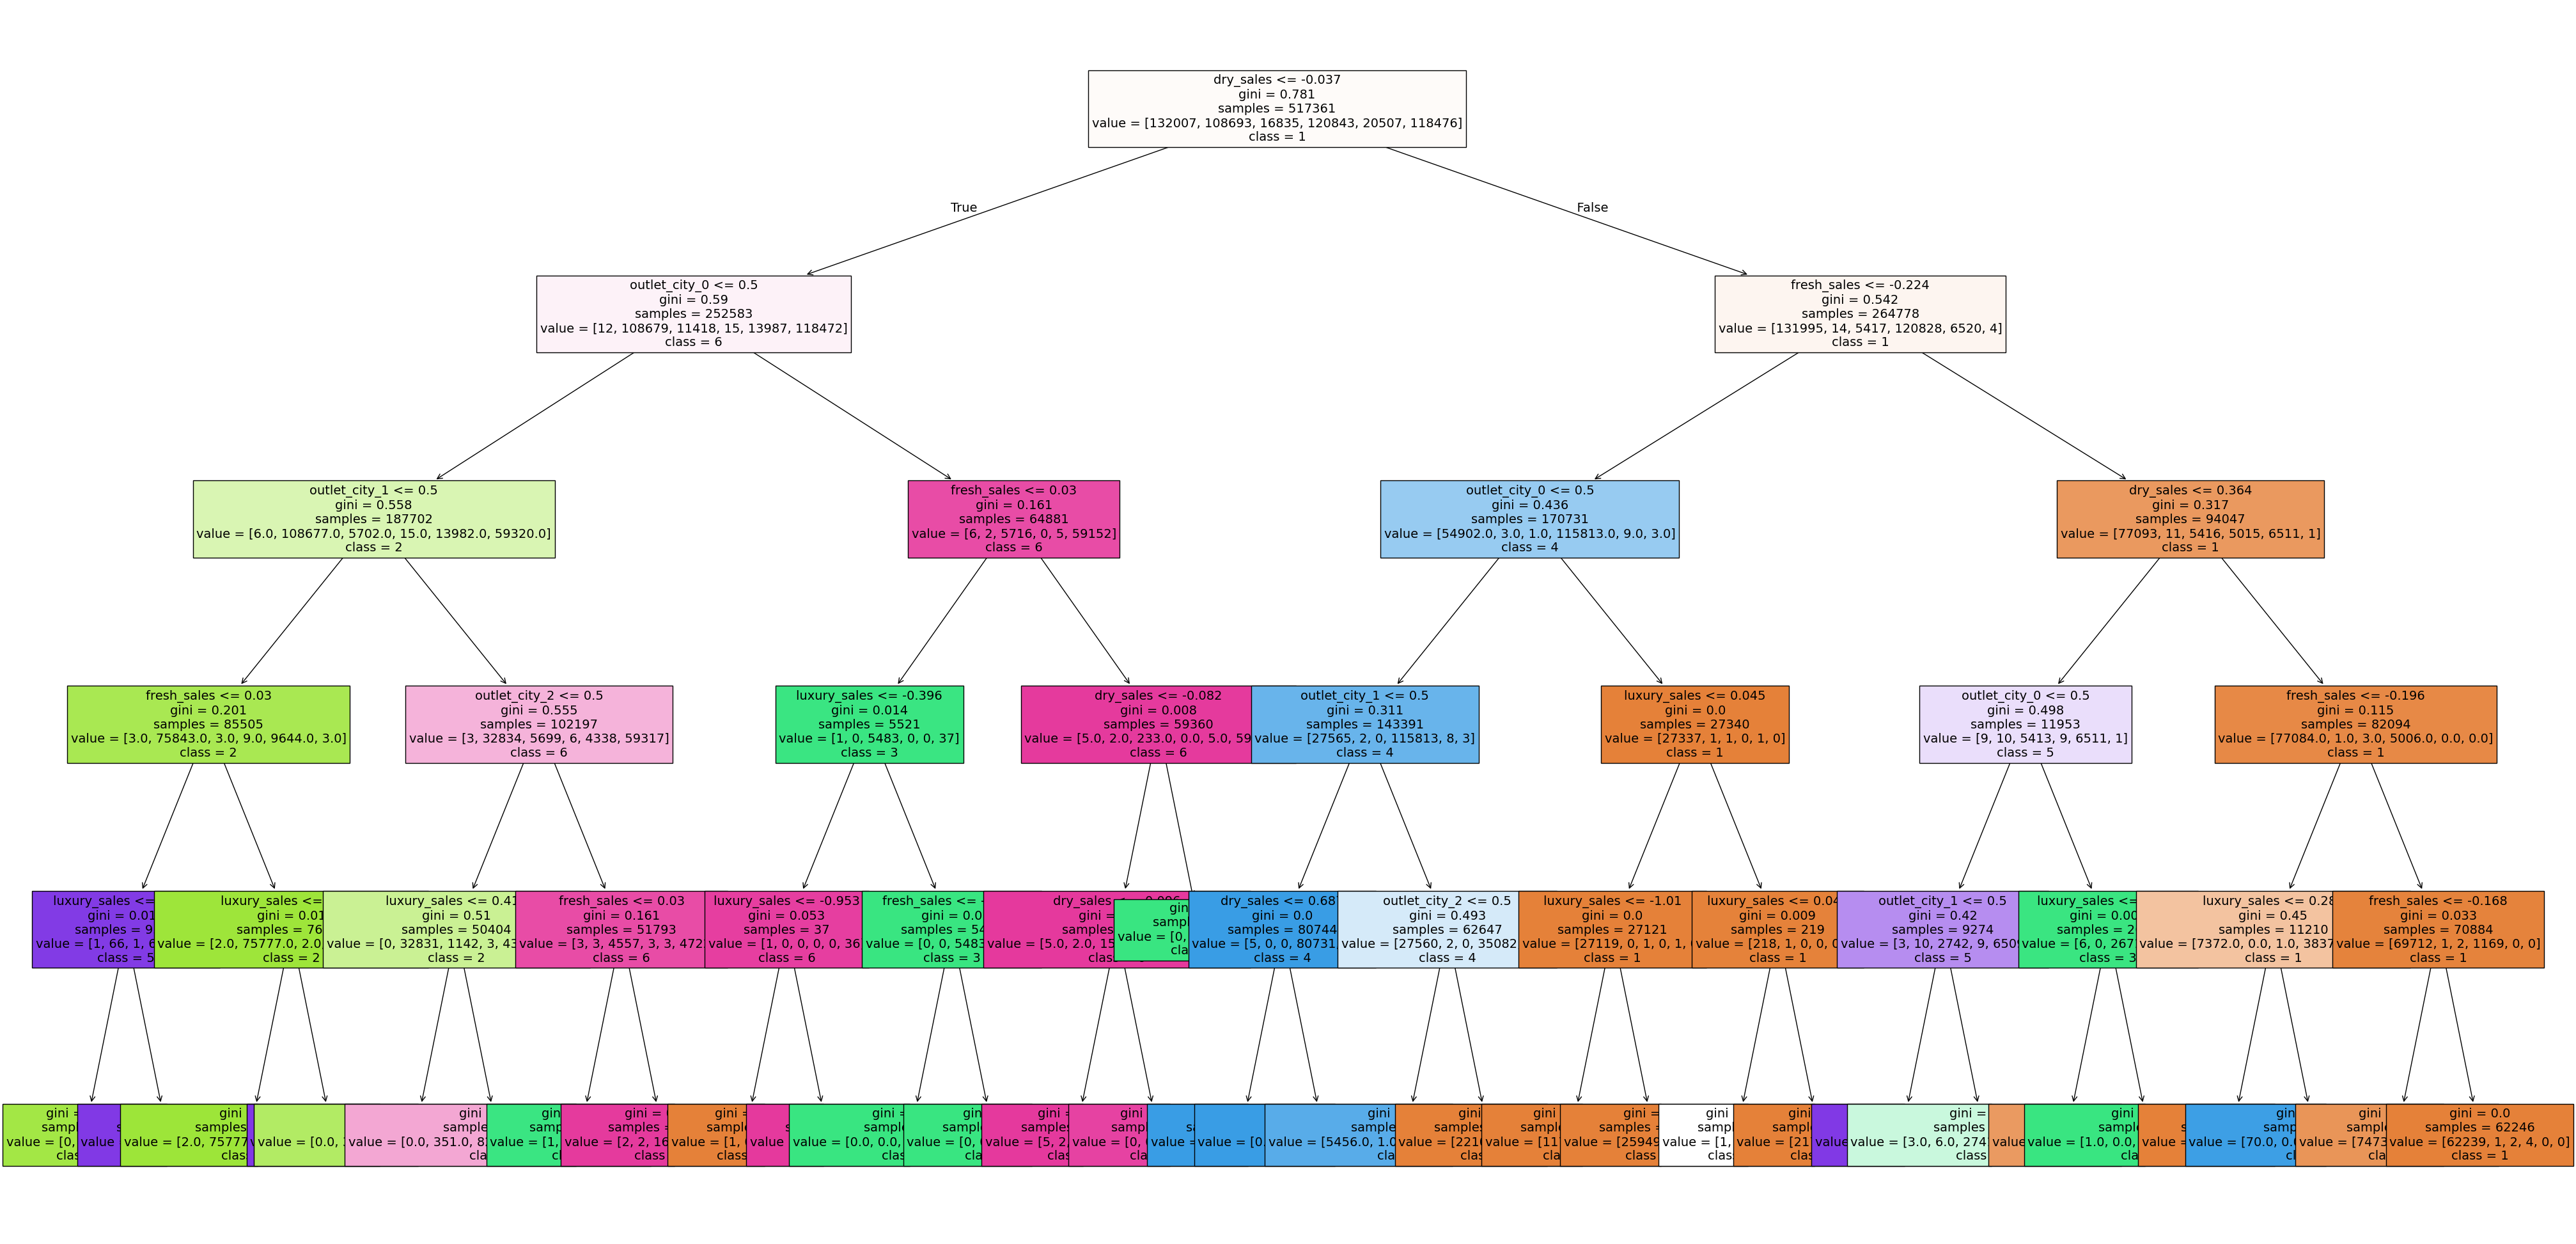

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(50,25))  # Large figure size
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], fontsize=14)
plt.show()

 Checking Model Accuracy and Metrics-TEST

In [ ]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:\n', class_report)

Accuracy: 0.9600
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.96      0.97     56972
           2       0.94      1.00      0.97     46367
           3       0.88      0.92      0.90      7277
           4       0.96      0.99      0.97     51589
           5       1.00      0.68      0.81      8789
           6       0.96      0.95      0.96     50733

    accuracy                           0.96    221727
   macro avg       0.95      0.92      0.93    221727
weighted avg       0.96      0.96      0.96    221727



In [ ]:
test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9600


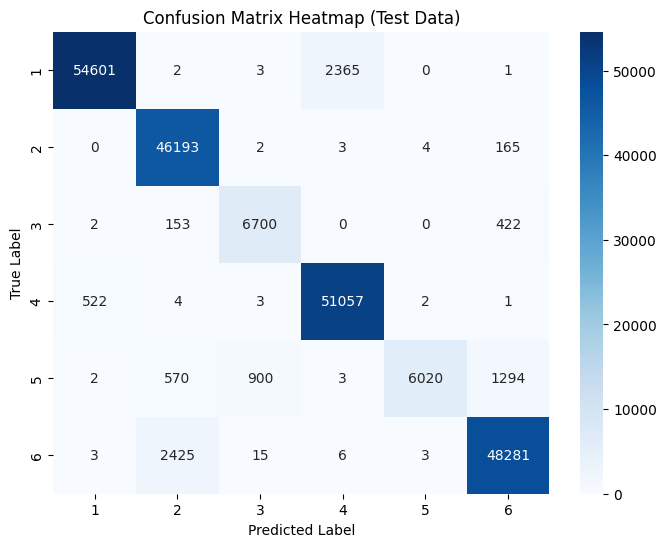

In [ ]:
y_pred = dt_model.predict(X_test)

conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

Checking Model Accuracy and Metrics- TRAIN

In [ ]:
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 0.9603


In [ ]:
# Predict on the training set to get predictions for the training data
y_train_pred = dt_model.predict(X_train)

# Now you can calculate the accuracy and classification report for the training set
accuracy = accuracy_score(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', class_report)

Accuracy: 0.9603
Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.96      0.97    132007
           2       0.94      1.00      0.97    108693
           3       0.88      0.92      0.90     16835
           4       0.96      0.99      0.97    120843
           5       1.00      0.69      0.82     20507
           6       0.96      0.95      0.96    118476

    accuracy                           0.96    517361
   macro avg       0.95      0.92      0.93    517361
weighted avg       0.96      0.96      0.96    517361



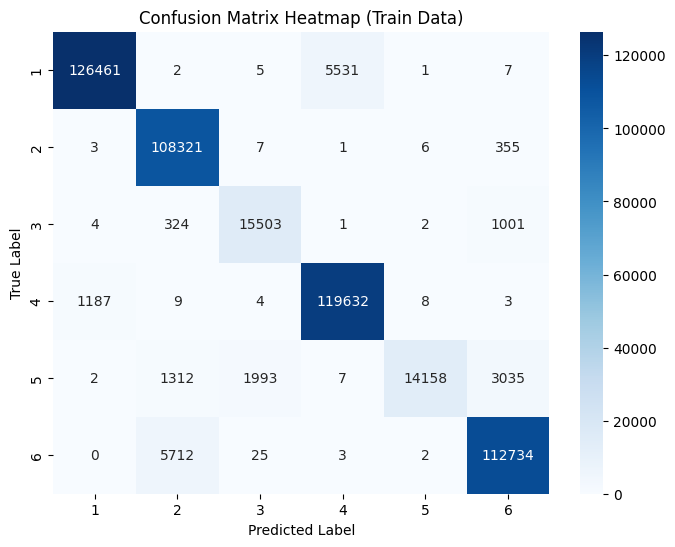

In [ ]:
y_train_pred = dt_model.predict(X_train)

# Calculate the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Train Data)')
plt.show()

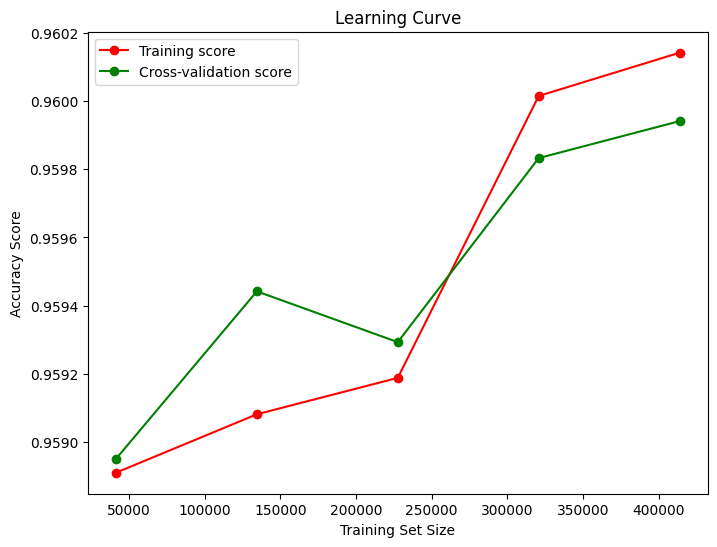

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(dt_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


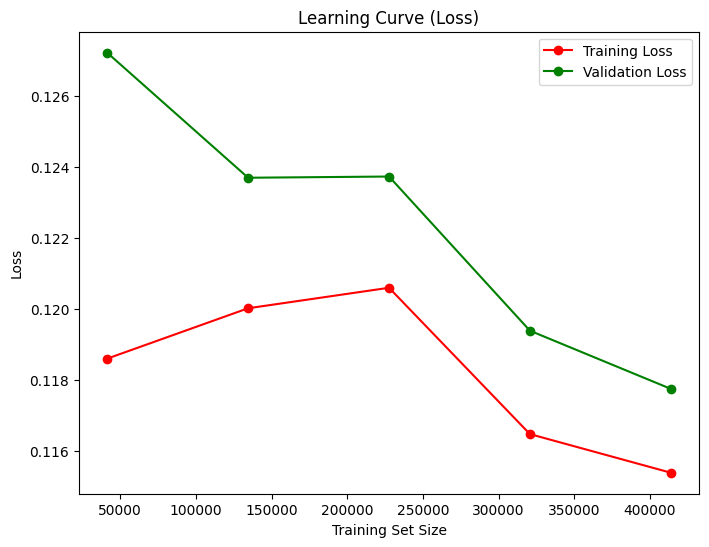

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    dt_model,
    X_train,
    y_train,
    cv=5,
    scoring='neg_log_loss',  # Use 'neg_log_loss' for loss curve
    n_jobs=-1
)

# Calculate the average loss for training and validation sets
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Negate the loss values to get the actual loss
train_loss = -train_mean
validation_loss = -test_mean

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_loss, 'o-', color="r", label="Training Loss")
plt.plot(train_sizes, validation_loss, 'o-', color="g", label="Validation Loss")

plt.xlabel("Training Set Size")
plt.ylabel("Loss")  # Changed y-axis label to "Loss"
plt.title("Learning Curve (Loss)")  # Updated title
plt.legend(loc="upper right")  # Adjusted legend location for loss curves
plt.show()